Задание: Прогнозирование качества вин
Вы будете работать с набором данных о качестве вин, который содержит характеристики различных вин и оценки их качества. Ваша задача — создать модель, которая будет предсказывать качество вина на основе его свойств. Используйте библиотеки Pandas, NumPy и scikit-learn.
Шаги выполнения задания:
1. Загрузка и предварительная обработка данных:
   * Загрузите уникальный набор данных о качестве вин, например, Wine Quality Data Set с сайта UCI Machine Learning Repository.
   * Проведите исследовательский анализ данных: изучите распределение значений, найдите и обработайте пропуски и выбросы. Нормализуйте данные, если это необходимо.
2. Разработка модели:
   * Используйте метод передачи через нейронную сеть (например, Feedforward Neural Network) для предсказания качества вина. Опишите, как вы реализуете обучение с помощью градиентного спуска и какие функции активации будете использовать.
   * Обучите модель на подготовленных данных и оцените её эффективность, используя метрики, такие как R² (коэффициент детерминации) и MAE (Mean Absolute Error).
3. Отчет и визуализация:
   * Подготовьте отчет с описанием всех этапов работы, включая код и графики. Используйте Matplotlib или Seaborn для визуализации результатов.
   * Включите график, который показывает зависимость предсказанных оценок от истинных значений, и обсудите, какие выводы можно сделать на основе этой визуализации. Также, предложите улучшения для вашей модели.

# 1. Загрузка и предварительная обработка данных

In [1]:
# import libs
import copy
import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, StandardScaler

STATE = 6112024

In [2]:
# read data
df_red = pd.read_csv("dtata/winequality-red.csv", sep=';')
df_white = pd.read_csv("dtata/winequality-white.csv", sep=';')

In [3]:
display(df_red.info())
display(df_white.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


None

In [4]:
df_red['color'] = 1
df_white['color'] = 0

In [5]:
df = df_red.merge(df_white, how="outer")
print(df.shape)
df.sample(10, random_state=STATE)

(6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
890,7.2,0.34,0.24,2.0,0.071,30.0,52.0,0.99576,3.44,0.58,10.1,5,1
881,7.2,0.60,0.04,2.5,0.076,18.0,88.0,0.99745,3.53,0.55,9.5,5,1
2604,5.8,0.36,0.26,3.3,0.038,40.0,153.0,0.99110,3.34,0.55,11.3,6,0
5571,6.4,0.17,0.30,2.8,0.034,33.0,125.0,0.99152,3.03,0.49,10.4,6,0
4545,5.1,0.29,0.28,8.3,0.026,27.0,107.0,0.99308,3.36,0.37,11.0,6,0
3425,6.5,0.32,0.12,11.5,0.033,35.0,165.0,0.99740,3.22,0.32,9.0,5,0
6232,6.2,0.28,0.41,5.0,0.043,50.0,188.0,0.99318,3.23,0.64,10.8,6,0
950,8.9,0.12,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.9,7,1
714,8.0,0.43,0.36,2.3,0.075,10.0,48.0,0.99760,3.34,0.46,9.4,5,1
1608,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.99380,3.22,0.45,11.0,6,0


In [6]:
# add "_" to columns name for convinience
columns = df.columns
for c in columns:
    df.rename(columns={c: ("_").join(c.split())}, inplace=True)

df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [7]:
# check for nan's
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [8]:
df.duplicated().sum()

1177

In [9]:
# df = df.drop_duplicates().reset_index(drop=True)
# df.shape

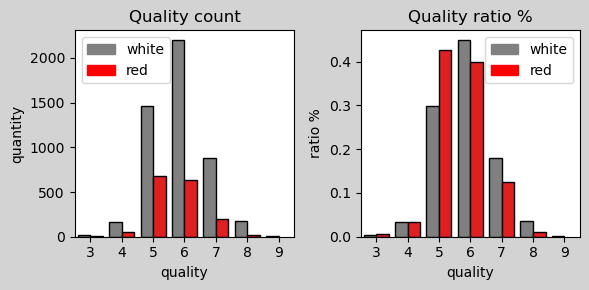

In [10]:
quality_table = df.groupby(by=['quality', 'color'], as_index=False).agg({'pH':'count'}).rename(columns={'pH':'quantity'})

white_red_count = df.color.value_counts()
quality_table['total'] = 0
mask1 = quality_table.color == 0
mask2 = quality_table.color == 1
quality_table.loc[mask1, 'total'] = white_red_count[0]
quality_table.loc[mask2, 'total'] = white_red_count[1]
quality_table['ratio'] = quality_table['quantity'] / quality_table['total']

_, axes = plt.subplots(figsize=[6, 3], ncols=2, facecolor='lightgrey')
sns.barplot(x='quality', y='quantity', hue='color', data=quality_table, palette=['grey', 'red'], edgecolor='black',  ax=axes[0])
axes[0].set_title('Quality count')
axes[0].set_ylabel('quantity')
sns.barplot(x='quality', y='ratio', hue='color', data=quality_table, palette=['grey', 'red'], edgecolor='black',  ax=axes[1]) 
axes[1].set_title('Quality ratio %')
axes[1].set_ylabel('ratio %')

grey_patch = mpatches.Patch(color='grey', label='white')
red_patch = mpatches.Patch(color='red', label='red')
for ax in axes:
    ax.legend(handles=[grey_patch, red_patch])

plt.tight_layout()
plt.show()

In [11]:
print('TOP WINES (QUALITY = 9)')
display(df.query('quality == 9')['color'].value_counts().to_frame())
print('TOP WINES (QUALITY = 3)')
display(df.query('quality == 3')['color'].value_counts().to_frame())

TOP WINES (QUALITY = 9)


,color
0,5


TOP WINES (QUALITY = 3)


,color
0,20
1,10


- целевая переменная "quality", в данном датасете, всего принимает 7 значений: от 3 до 9;
- присутствует дисбаланс;
- всего количество объектов красных вин: 1599, белых вин: 4898;
- в процентном соотношении, оценки качества выше у белых вин;
- оценка 9 (самая высокая) есть только у 5 белых вин;
- оценка 3 (самая низкая) у 20 белых вин и у 10 красных;

In [12]:
def draw_plots(df, kind, legend=True):
    _, axes = plt.subplots(figsize=[16, 4], ncols=6, nrows=2, facecolor='lightgrey')
    axes = axes.ravel()
    
    for i, col in enumerate(df[df.columns[:-1]].columns):
        df_tmp = df.pivot(values=col, columns='color')
        if kind == 'boxplot':
            sns.boxplot(data=df_tmp, palette=['grey', 'red'], saturation=0.45, ax=axes[i])
            axes[i].set_ylabel(col)
        elif kind == 'histplot':
            sns.histplot(data=df_tmp, bins=30, palette=['grey', 'red'],  ax=axes[i])
            axes[i].set_xlabel(col)
        elif kind == 'kdeplot':
            sns.kdeplot(data=df_tmp, palette=['grey', 'red'], fill=True, ax=axes[i])
            axes[i].set_xlabel(col)
        elif kind=='hexbin':
            axes[i].hexbin(x=df['quality'], y=df[col], gridsize=14, cmap='gnuplot')
            axes[i].set_xlabel('quality')
            axes[i].set_ylabel(col)
        else:
            raise ValueError("Wrong value for arg 'kind'.")
            
        if legend:
            axes[i].set_xlabel(col)
            axes[i].grid()
            grey_patch = mpatches.Patch(color='grey', label='white')
            red_patch = mpatches.Patch(color='red', label='red')
            axes[i].legend(handles=[grey_patch, red_patch])

    plt.tight_layout()
    plt.show()

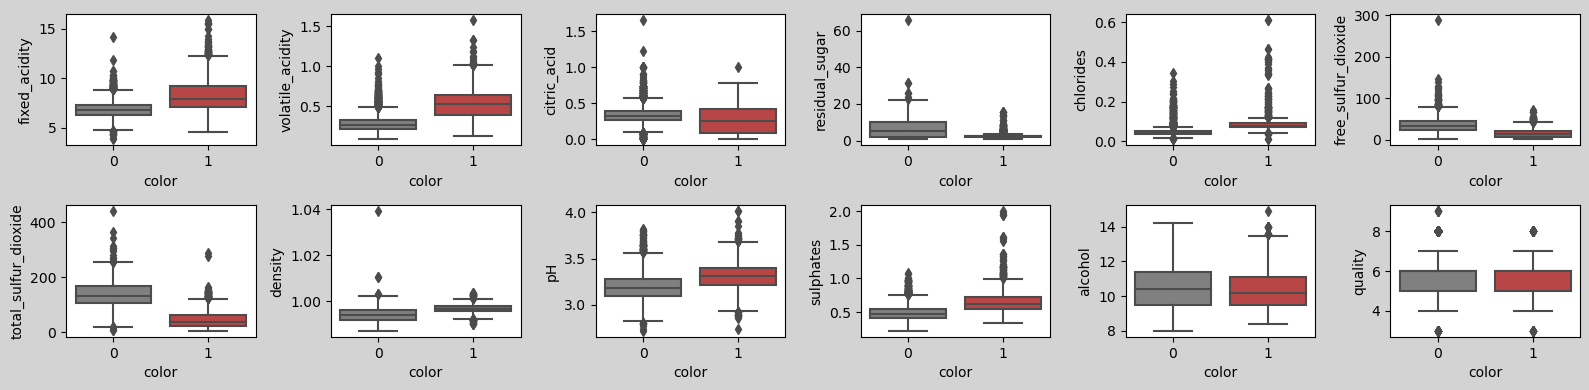

In [13]:
draw_plots(df, 'boxplot', False)

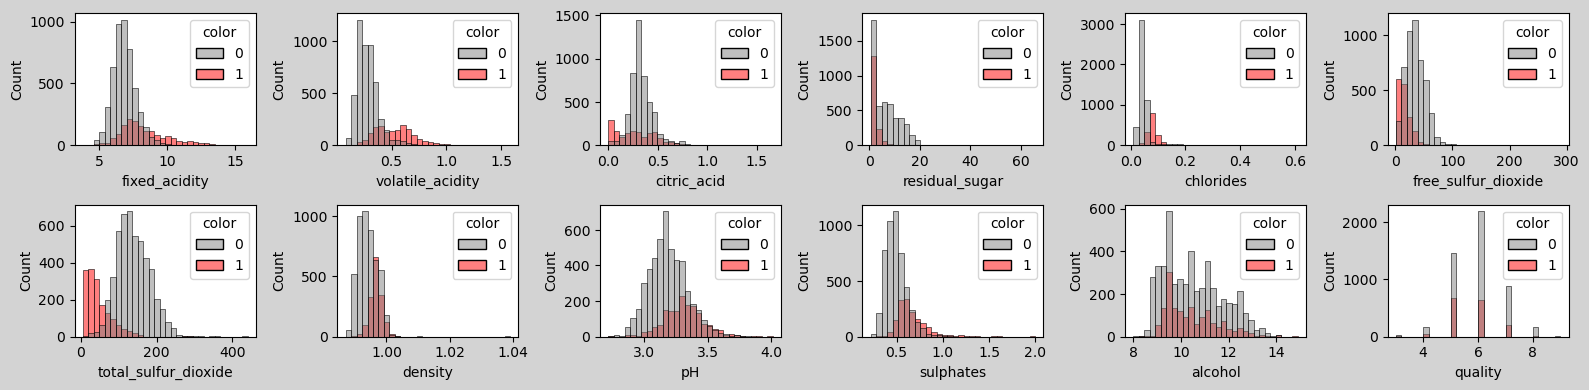

In [14]:
draw_plots(df, 'histplot', False)

- распределения значений параметров у красных и белых вин отличаются, кроме содержания процентного содержания алкоголя ("alcohol").

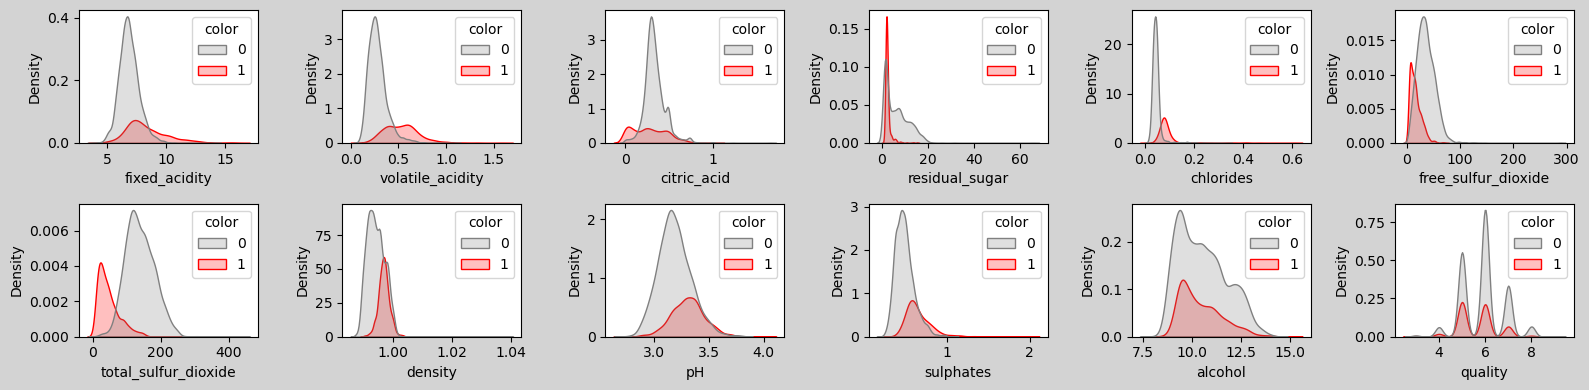

In [15]:
draw_plots(df, 'kdeplot', False)

WHITE WINES


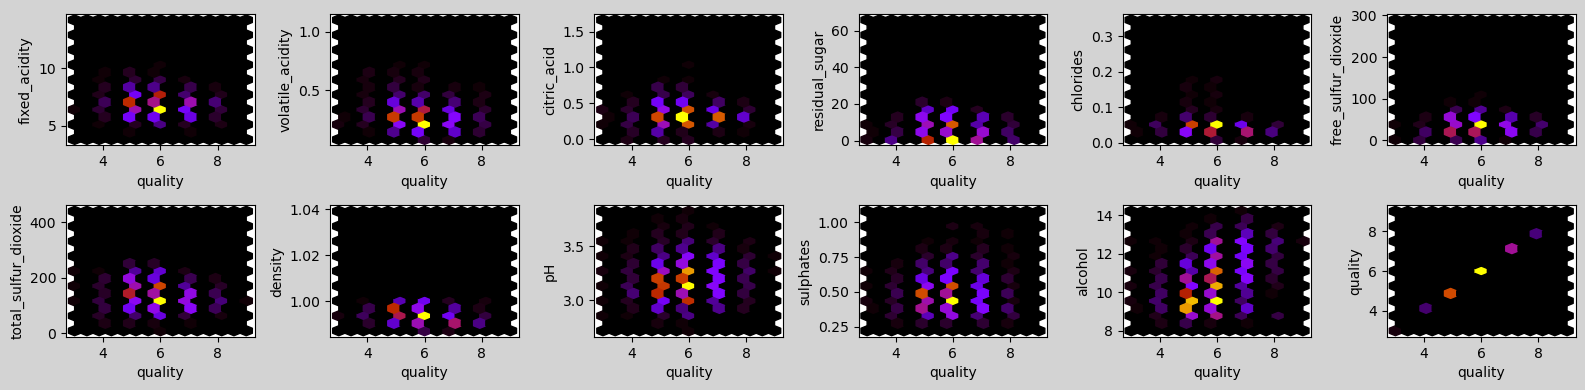

In [16]:
print('WHITE WINES')
draw_plots(df.query('color==0'), 'hexbin', False)

RED WINES


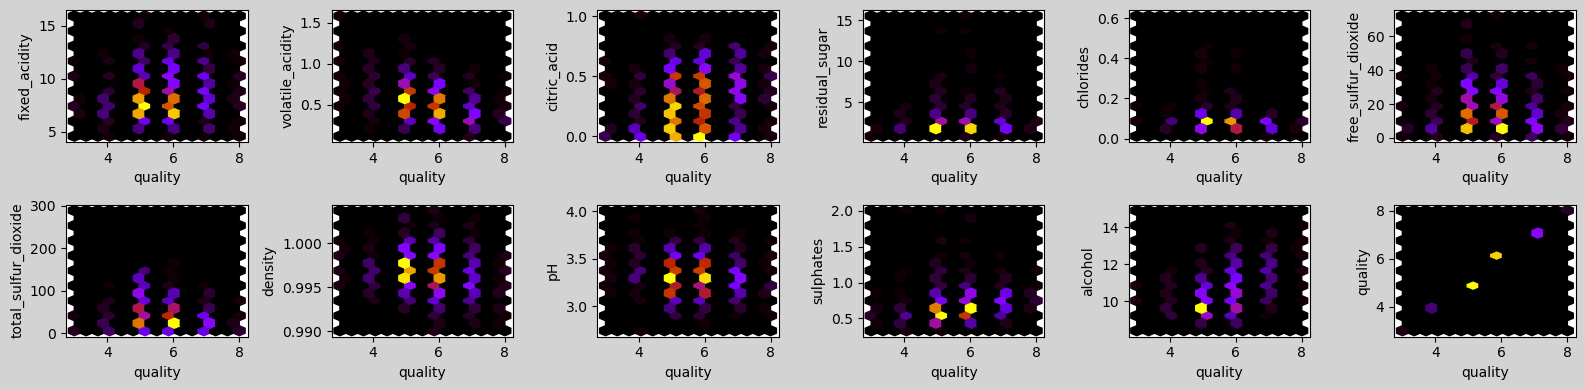

In [17]:
print('RED WINES')
draw_plots(df.query('color==1'), 'hexbin', False)

In [18]:
# drop the outliers
n_neighbours = 55


num_feat =  ['volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'total_sulfur_dioxide', 'sulphates', 'alcohol']
cat_feat = ['color']

# df_white = df.query('color==0').reset_index(drop=True)
# df_red = df.query('color==1').reset_index(drop=True)
# white_before, red_before = df_white.shape[0], df_red.shape[0]
# print('Before:', white_before, red_before)

# isolation_forest_white = IsolationForest(n_estimators=n_neighbours)
# isolation_forest_red = IsolationForest(n_estimators=n_neighbours)

# estimator_white = isolation_forest_white.fit_predict(df_white[num_feat])
# estimator_red = isolation_forest_red.fit_predict(df_red[num_feat])

# estimator_white_mask = estimator_white == -1
# estimator_red_mask = estimator_red == -1

# df_white.drop(df_white[estimator_white_mask].index, inplace=True)
# df_red.drop(df_red[estimator_red_mask].index, inplace=True)

# print('After:', df_white.shape, df_red.shape)
# df = df_red.merge(df_white, how="outer")

# print(f'Totally dropped: {white_before-df_white.shape[0]}, {red_before-df_red.shape[0]}')

In [19]:
df = df.query('color==0')

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['quality', 'color']), df['quality'], 
                                                    test_size=0.1, 
                                                    stratify=df['quality'], 
                                                    random_state=STATE)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4408, 11) (490, 11) (4408,) (490,)


In [20]:
X_normalizer = Normalizer(norm='l2', copy=True)

X_train_norm = X_normalizer.fit_transform(X_train)
X_test_norm = X_normalizer.transform(X_test)
print(X_train_norm.shape, X_test_norm.shape)

(4408, 11) (490, 11)


# 2. Разработка модели

In [21]:
class NN_from_scratch:
    @classmethod
    def check_args(cls, layer_dims, lr):
        if not isinstance(layer_dims, list) :
            raise TypeError (f"layer_dims <class 'list'> expected but {type(layer_dims)} were given;")
        res = all([isinstance(x, int) for x in layer_dims])
        if not res:
            raise TypeError(f"all layer_dims elements must be <class 'int'>;")
        if not isinstance(lr, float):
            raise TypeError (f"layer_dims <class 'float'> but {type(lr)} were given;")
            
        return layer_dims, lr
    
    def __init__(self, layer_dims, lr):
        self.__layer_dims, self.__lr = self.check_args(layer_dims, lr)
        self.__parameters = self.init_parameters(self.__layer_dims)

    @classmethod
    def init_parameters(cls, layer_dims):
        parameters = {}
        L = len(layer_dims)  
        n_h = layer_dims[0]
        for l in range(1, L - 1):
            parameters["W" + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * np.sqrt(
                2 / layer_dims[l - 1])
            parameters["b" + str(l)] = np.zeros([layer_dims[l], 1])

        parameters["W" + str(L - 1)] = np.random.randn(layer_dims[L - 1], layer_dims[L - 2]) / np.sqrt(
            layer_dims[L - 1] + layer_dims[L - 2])
        parameters["b" + str(L - 1)] = np.zeros([layer_dims[L - 1], 1])
        
        return parameters
    
    @classmethod
    def without_activation_foward(cls, Z):
        A = Z
        cache = Z
        
        return A, cache
    
    @classmethod
    def relu_forward(cls, Z):
        A = np.maximum(0, Z)
        cache = Z
        
        return A, cache

    @classmethod
    def linear_forward(cls, A, W, b):
        Z = np.dot(W, A) + b
        cache = A, W, b
        
        return Z, cache

    @classmethod
    def linear_activation_forward(cls, A_prev, W, b, activation):
        if activation == "relu":
            Z, linear_cache = cls.linear_forward(A_prev, W, b)
            A, activation_cache = cls.relu_forward(Z)
        elif activation == 'linear':
            Z, linear_cache = cls.linear_forward(A_prev, W, b)
            A, activation_cache = cls.without_activation_foward(Z)
            
        cache = (linear_cache, activation_cache)
        
        return A, cache

    @classmethod
    def L_model_forward(cls, X, parameters):
        A = X
        L = len(parameters) // 2
        caches = []

        for l in range(1, L):
            A_prev = A
            A, cache = cls.linear_activation_forward(A_prev, parameters["W" + str(l)], parameters["b" + str(l)], "relu")
            caches.append(cache)

        AL, cache = cls.linear_activation_forward(A, parameters["W" + str(L)], parameters["b" + str(L)], "linear")
        caches.append(cache)

        return AL, caches

    @classmethod
    def compute_cost(cls, AL, Y):
        m = Y.shape[1]
        cost = 1/m * np.sum((Y  - AL) ** 2)
        cost = np.squeeze(cost)
        
        return cost

    @classmethod
    def without_activation_backward(cls, dA, cache):
        dZ = dA
        
        return dZ
    
    @classmethod
    def relu_backward(cls, dA, cache):
        dZ = np.array(dA, copy=True)
        Z = cache
        dZ[Z <= 0] = 0
        
        return dZ

    @classmethod
    def linear_backward(cls, dZ, cache):
        A_prev, W, b = cache
        m = A_prev.shape[1]

        dW = np.dot(dZ, A_prev.T) / m
        db = np.sum(dZ, axis=1, keepdims=True) / m
        dA_prev = np.dot(W.T, dZ)

        return dA_prev, dW, db

    @classmethod
    def linear_activation_backward(cls, dA, cache, activation):
        linear_cache, activation_cache = cache

        if activation == "relu":
            dZ = cls.relu_backward(dA, activation_cache)
            dA_prev, dW, db = cls.linear_backward(dZ, linear_cache)
            
        elif activation == 'linear':
            dZ = cls.without_activation_backward(dA, activation_cache)
            dA_prev, dW, db = cls.linear_backward(dZ, linear_cache)

        return dA_prev, dW, db

    @classmethod
    def L_model_backward(cls, AL, Y, caches):
        L = len(caches)
        grads = {}
        Y = Y.reshape(AL.shape)
        dAL = 2 * (AL - Y)

        current_cache = caches[L - 1]
        dA_prev_temp, dW_temp, db_temp = cls.linear_activation_backward(dAL, current_cache, "linear")
        grads['dA' + str(L - 1)] = dA_prev_temp
        grads['dW' + str(L)] = dW_temp
        grads['db' + str(L)] = db_temp

        for l in reversed(range(L - 1)):
            current_cache = caches[l]
            dA_prev_temp, dW_temp, db_temp = cls.linear_activation_backward(grads['dA' + str(l + 1)], current_cache, 'relu')
            grads['dA' + str(l)] = dA_prev_temp
            grads['dW' + str(l + 1)] = dW_temp
            grads['db' + str(l + 1)] = db_temp

        return grads

    @classmethod
    def update_parameters(cls, params, grads, learning_rate):
        parameters = copy.deepcopy(params)
        L = len(params) // 2

        for l in range(L):
            parameters['W' + str(l + 1)] -= learning_rate * grads['dW' + str(l + 1)]
            parameters['b' + str(l + 1)] -= learning_rate * grads['db' + str(l + 1)]

        return parameters

    def predict(self, X_val, Y_val, params):
        A, _ = self.L_model_forward(X_val.T, params)
        mae = mean_absolute_error(Y_val, A[0].T)
        r2 = r2_score(Y_val, A[0].T)

        return A[0], mae, r2

    def fit(self, X, Y, X_val, Y_val, batch_size, num_iterations, verbose=1):
        m = X.shape[0]
        n_batch = m // batch_size
        costs = []
        mae_score = []
        r2_score = []
        
        
        n_h = X_train.shape[1]
        self.__layer_dims.insert(0, n_h)
        params = self.init_parameters(self.__layer_dims)
        
        start_learn = datetime.datetime.now()
        for i in range(1, num_iterations + 1):
            start_epoch = datetime.datetime.now()
            for batch in range(1, n_batch + 1):
                if batch <= n_batch:
                    X_batch = X[batch * batch_size - batch_size: batch * batch_size].T
                    Y_batch = Y[batch * batch_size - batch_size: batch * batch_size].values.reshape(-1, 1)

                else:
                    X_batch = X[batch * batch_size:].T
                    Y_batch = Y[batch * batch_size:].values.reshape(-1, 1)

                AL, caches = self.L_model_forward(X_batch, params)
                cost = self.compute_cost(AL, Y_batch)
                grads = self.L_model_backward(AL, Y_batch, caches)
                params = self.update_parameters(params, grads, self.__lr)

            epoch_time = datetime.datetime.now() - start_epoch
            costs.append(cost)

            if verbose == -1: 
                print(f'epoch: {i}/{num_iterations} ---batch: {batch}/{n_batch} ---epoch_time: {epoch_time.seconds} sec. ---cost: {cost}')
            elif i % verbose == 0:
                _, mae, r2 = self.predict(X_val, Y_val, params)
                mae_score.append(mae)
                r2_score.append(r2)
                print(f'epoch: {i}/{num_iterations} ---batch: {batch}/{n_batch} ---epoch_time: {epoch_time.seconds} sec. ---cost: {cost} ---val_data_mae: {mae} ---val_data_r2: {r2}')
                
        learn_time = datetime.datetime.now() - start_learn
        scores = [costs, mae_score, r2_score]
        
        return params, scores, learn_time
        
    def get_parameters(self):
        return self.__parameters

In [22]:
model = NN_from_scratch([12, 3, 1], lr=0.03)
params, costs, learn_time = model.fit(X_train_norm, y_train, X_test_norm, y_test, batch_size = 80, num_iterations=10000, verbose=1000)

epoch: 1000/10000 ---batch: 55/55 ---epoch_time: 0 sec. ---cost: 5390.513012692816 ---val_data_mae: 0.61462983620869 ---val_data_r2: 0.2398885404213439
epoch: 2000/10000 ---batch: 55/55 ---epoch_time: 0 sec. ---cost: 5555.693965971192 ---val_data_mae: 0.6175140503992879 ---val_data_r2: 0.2531826457161287
epoch: 3000/10000 ---batch: 55/55 ---epoch_time: 0 sec. ---cost: 5552.4608212546245 ---val_data_mae: 0.615417932615117 ---val_data_r2: 0.2623793147908865
epoch: 4000/10000 ---batch: 55/55 ---epoch_time: 0 sec. ---cost: 5672.03842051655 ---val_data_mae: 0.6133680449124359 ---val_data_r2: 0.2659220631753395
epoch: 5000/10000 ---batch: 55/55 ---epoch_time: 0 sec. ---cost: 5711.645774504495 ---val_data_mae: 0.60730649916292 ---val_data_r2: 0.2841080016643781
epoch: 6000/10000 ---batch: 55/55 ---epoch_time: 0 sec. ---cost: 5682.954113873453 ---val_data_mae: 0.6064840452079969 ---val_data_r2: 0.2872169688055992
epoch: 7000/10000 ---batch: 55/55 ---epoch_time: 0 sec. ---cost: 5644.45920734787

# 3. Отчет и визуализация:

,predictions,y_true
282,6.0,4
38,6.0,7
150,6.0,6
35,6.0,8
211,5.0,4
44,5.0,5
318,7.0,6
42,5.0,6
92,5.0,5
420,6.0,6


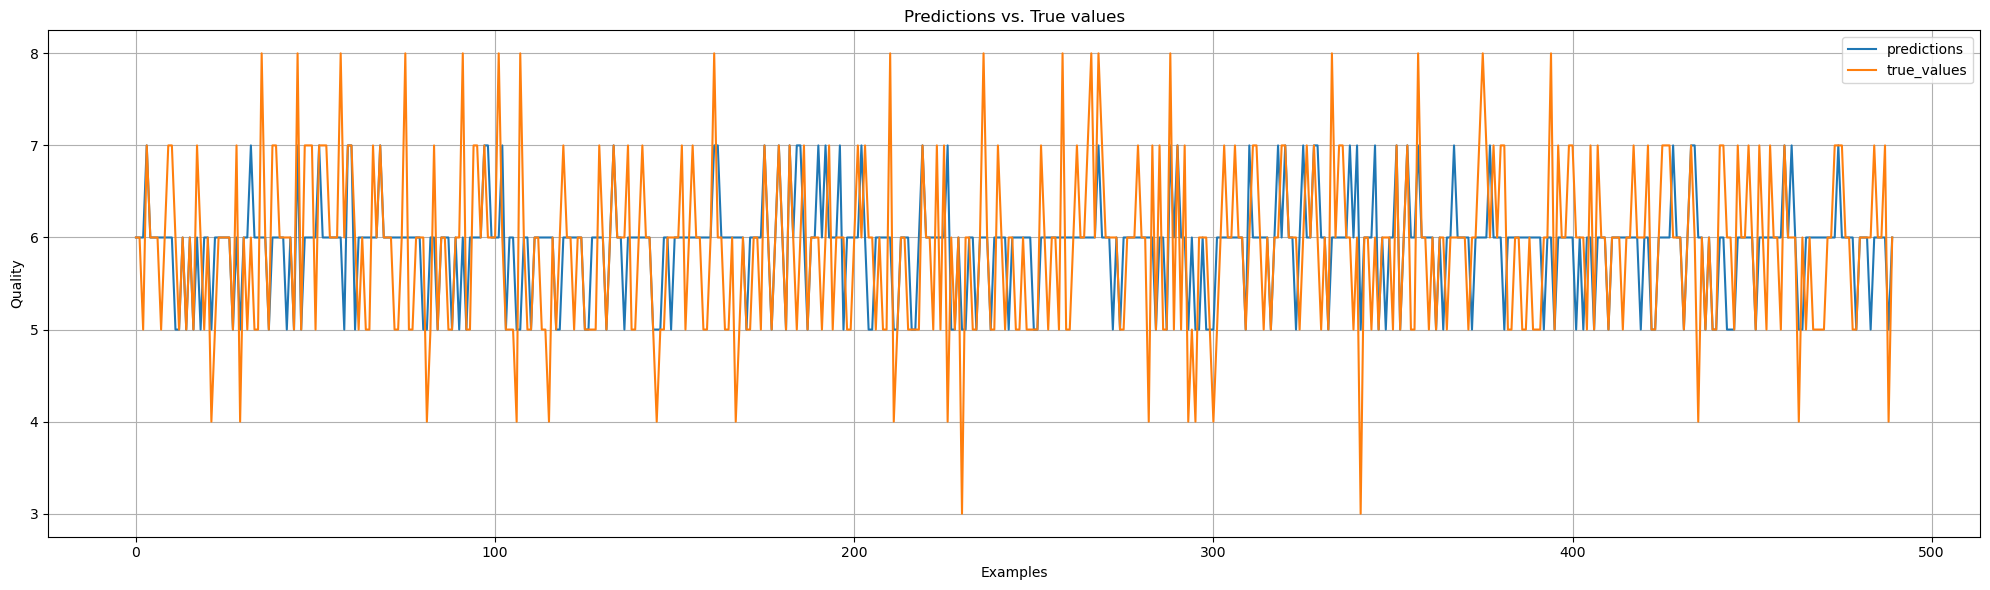

In [23]:
preds, _, _  = model.predict(X_test_norm, y_test, params)
preds = np.round(preds, 0)
df_results = pd.DataFrame({'predictions': preds, 'y_true': y_test.values})

display(df_results.sample(10))
_, ax = plt.subplots(figsize=[20, 6])
sns.lineplot(x=df_results.index, y=df_results['predictions'], ax=ax)
sns.lineplot(x=df_results.index, y=df_results['y_true'], ax=ax)

ax.set_ylabel('Quality')
ax.set_xlabel('Examples')
ax.set_title('Predictions vs. True values')
ax.legend(['predictions', 'true_values'])
ax.grid(True)
plt.tight_layout()
plt.show()

### Загрузка и предварительная обработка данных:
Загрузите уникальный набор данных о качестве вин, например, Wine Quality Data Set с сайта UCI Machine Learning Repository.
Проведите исследовательский анализ данных: изучите распределение значений, найдите и обработайте пропуски и выбросы. Нормализуйте данные, если это необходимо.

Было загружено 2 датасета: для белых и для красных вин. В ходе краткого исследовательского анализа данных было выявлено то, что оба набора данных имеют одинаковые признаки. Однако, количество объектов относящихся к красным винам значительно меньше объектов белых вин. Пропущенные значения отсутствовали. Найдены дубликаты - 1177 объектов (не удалял поскольку данных и так недостаточно). Все признаки имеют соответствующий тип данных.

Визуализация качества вин продемонстрировала сильный дисбаланс классов, например для оценки качества 3 (наименьш.) и для оценки качества 9 (наибольш.) всего по 30 и 5 объектов соответственно.

- целевая переменная "quality", в данном датасете, всего принимает 7 значений: от 3 до 9;
- присутствует дисбаланс;
- всего количество объектов красных вин: 1599, белых вин: 4898;
- в процентном соотношении, оценки качества выше у белых вин;
- оценка 9 (самая высокая) есть только у 5 белых вин;
- оценка 3 (самая низкая) у 20 белых вин и у 10 красных;

Также были построены графики для исследования признаков: 
- Boxplot для каждого признака и для каждого типа вина для сравнительного анализа параметров типов вин и выявления выбросов:
в ходе исследования графиков стало понятно что одинаковые параметры для красных и белых вин имеют отличия. Красные вина, в среднем, обладают большими значениями параметров: fixed_acidity, volatile_acidity, chlorides, density, pH, sulphates. Белые вина, в среднем, обладают большими значениями параметров: citric_acid, residual_sugar, free_sulfur_dioxide, total_sulfur_dioxide. Также, на графиках видно, что все параметры имеют экстремальные значения, которые могут быть выбросами.

- Гистограммы и графики плотности распределения для исследования распределения для каждого типа вина: гистограммы и графики плотности также демонстрировали наличичие выбросов в признаках, показали то, что значения для некоктрых признаков относительно разных типов вин, возможно, имеют разное распределения. Судить об этом наверняка трудно из-за небольшого количества объектов красных вин.

- Графики рассеивания для выявления зависимости целевой переменной от признаков для каждого типа вина - показали выраженнную зависимость целевой переменной от параметра "alcohol" у обоих типов вин, а также некая зависимость прослеживается от "volatile_acidity" для белых вин.


Наиболее вероятные выбросы у красных вин:
- fixed_acidity
- volatile_acidity
- chlorides
- total_sulfur_dioxide
- sulphates
- alcohol;

Наиболее вероятные выбросы у белых вин:
- citric_acid
- residual_sugar
- chlorides
- free_sulfur_dioxide
- total_sulfur_dioxide
- density

Для ускорения процесса поиска выбросов применялся алгоритм KNN. Но при удалении выбросов, найденных таким образом (от 300 до 900 объектов в зависимости от параметра n_neighbours - числа соседей), эффективность обучения снижалась из-за резкого сокращения количества данных. Т.е. обработка выбросов требует более ювелирного подхода и рассмотрения каждого признака в отдельности относительно обоих типов вин.

При выборе признаков для обучения модели, исключили признаки "fixed_acidity" и "free_sulfur_dioxide", поскольку у них есть схожие пары: "volatile_acidity" и "total_sulfur_dioxide". Среди оставшихся выберали наиболее волатильные относительно показателя качества для красных и белых вин:

- volatile_acidity
- citric_acid
- residual_sugar
- chlorides
- total_sulfur_dioxide
- sulphates
- alcohol

Данные были разделены на тренировочную и тестовую выборки с учетом распредения оценки качества. Тестовая выборка - 10% от объема датасета. 


### Разработка модели:
Для решения задачи регрессии и с учетом требований ТЗ, был имплементирован класс NN_from_scratch при помощи библиотеки NumPy. Класс реализует функционал полносвязной нейронной сети (с произвольным количеством слоев и нейронов в них) при помощи ряда вспомогательных функций, которые можно объединить в два больших блока: forward_propagation, backward_propagation. Методы блока forward_propagation инициализируют начальные значения весов и расчитывают значние функции стоимости. Методы, относящиеся к блоку back_propagation расчитывют значения градиентов и обновляют веса с учетом выбранной скорости обучения. Для оптимизации используюется алгоритм "Mini batch gradient descent" - хороший выбор при малом количестве данных. В качестве внутренних функций активаций была выбрана ReLu - поскольку она не тербует больших вычилительных затрат и легко реализуется на практике, а свойстенные ей недостатки не сильно влияют на неглубокие нейронные сети как наша. Выходное значение расчитывает слой с одним нейроном, в котором используется линейная функция активации - представляет собой  взвешенную сумму всех параметров.

###  Отчет и визуализация:
Для обучения модели использовались только данные о белых винах. 
Результаты на тестовой выборке:
- MAE - 0.59
- R2 - 0.3

График предсказанных значений показывает, что модель предсказывает значениея качества в диапазоне от 5 до 7. Это происходит из-за недостаточного количества данных в других категорях. Метрики качества оставляют желать лучшего. Модель работает плохо. Для дальнейшей работы и улучшения качества предсказаний необходимо провести тщательный анализ признаков на предмет выбросов и влияния на целевую переменную. Решить проблему с количеством данных для оценок качества где данные практически отсутствуют, возможно, методом upsampling. При наличичии достаточного количества данных, при обучении, использовать признак цвета вина. Попробовать решить задачу классфикации. Использовать классические алгоритмы машинного обучения. 